**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Higher order income risk](#toc1_)    
- 2. [Problem 2: Inflation in an exchange model](#toc2_)    
- 3. [Problem 3: Segregation model](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [130]:
from types import SimpleNamespace

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
from matplotlib import colors

from Problem_1 import Consumer
from Problem_2 import ConflictModel

## 1. <a id='toc1_'></a>[Problem 1: Higher order income risk](#toc0_)

We consider a consumer living in **two periods**. In the **second period** she behaves as:

$$
\begin{align*}
v_{2}(m_{2})	&=\max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho} \\
	&\text{s.t.} \\
a_{2}	&=m_{2}-c_{2} \\
c_{2}, a_{2}	&\geq0 \\
\end{align*}
$$

This implies:

$$
v_{2}(m_{2})=\frac{m_{2}^{1-\rho}}{1-\rho}
$$

In the **first period**, the consumer solves:

$$
\begin{align*}
v_{1}(m_{1})	&=\max_{c_{1}}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_{2}(m_{2})\right] \\
	&\text{s.t.} \\
a_{1}	&=m_{1}-c_{1} \\
c_{1},a_{1}	&\geq0 \\
m_{2}	&=(1+r)a_{1}+y_{2} \\

y_{2}	&= \begin{cases}
1 & \nu_2 < \pi\\
\exp(\psi_2) & \text{else}
\end{cases} \\
\psi_2	&\sim\mathcal{N}(-0.5\sigma_{\psi}^{2},\sigma_{\psi}^{2}) \\
\nu_2	&\sim\mathcal{U}(0,1) \\
\end{align*}
$$

The standard random variables $\psi_2$ and $\nu_2$ are approximated with $N$ random draws.

The initial value of cash-on-hand is $m_1 = 1.0$.
The baseline parameters are as in the code below.

In [132]:
par = SimpleNamespace()

par.beta = 0.90
par.rho = 2.0
par.r = 0.05    
par.pi = 0.50
par.sigma_psi = 0.10

par.m1 = 2.0
par.N = 100_000

**Questions 1:** Plot the distribution of $y_2$.

In [133]:
# write your answer here

In [134]:
cons = Consumer(par)

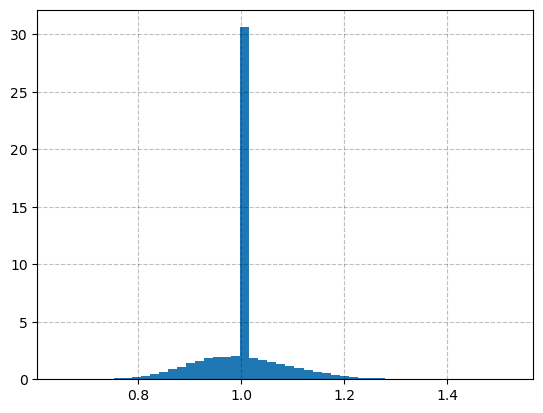

In [135]:
cons.simulate(seed=2020)
cons.plot_y2()

**Question 2:** Find the optimal choice of $c_1$ and the implied $v(m_1)$.

In [136]:
# write your answer here

In [137]:
cons.solve()

c1 =  1.531
v1 = -1.258


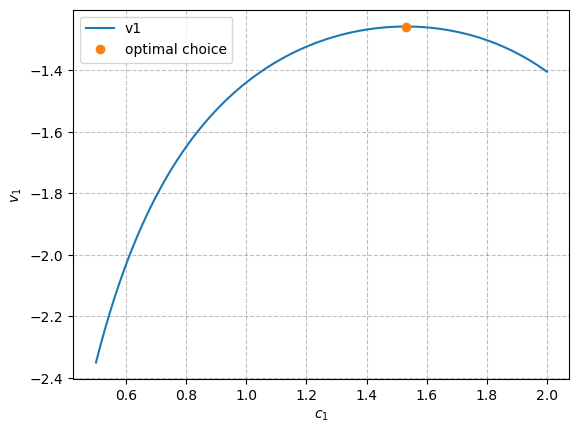

In [138]:
cons.plot_v1()

**Question 3:** Plot combinations of $(\pi,\sigma_{\psi})$ implying that $v(m_1)$ is unchanged. Comment.

In [139]:
# write your answer here

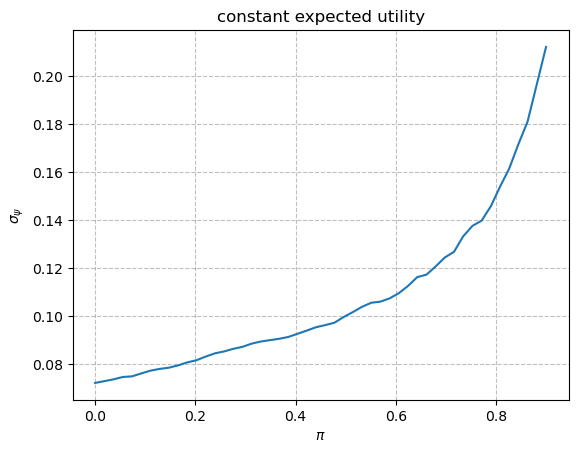

In [140]:
cons.constant_pars()

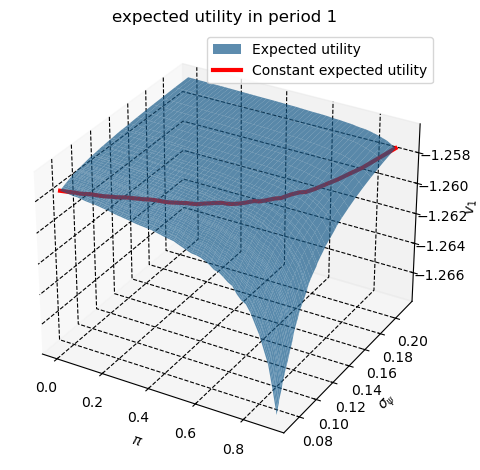

In [141]:
cons.plot_v1_3dplot()

## 2. <a id='toc2_'></a>[Problem 2: Inflation in an exchange model](#toc0_)

Consider an exchange economy with two agents, $A$ and $B$ each with their own distinct good. Their endowment are $e_A$ and $e_B$. Agent $A$ is the buyer, she takes the relative price of the two goods, $p$, as given and chooses the amount of agent $B$'s good to exchange for her own. Agent $B$ is the seller, she sets the relative price between the goods, optimally taking into account $A$'s demand.

**Agent $A$, the buyer, solves:**
$$
\begin{align}
V_{A}(p) = \max_{c,c'} u_A(c,c') \\ s.t. \; c+pc'=e_{A} \\
\end{align}
$$
Or simply:
$$
\begin{align}
V_{A}(p) = \max_{c'} u_A(e_{A}-pc',c')  \\
\end{align}
$$
Where $c$ is consumption of her own good and $c'$ is consumption of the other good.<br>
$u_A$ is her utility function. <br>
This optimization yields the optimal demand function:
$$
\begin{align}
\Rightarrow c' = D(p)
\end{align}
$$

**Agent $B$, the seller, solves:**
\begin{align}
p^* \equiv \arg\max_p v_B(p) \\
\end{align}
where
\begin{align}
\;\,v_B(p) \equiv u_B(e_B-D(p),pD(p))
\end{align}

$u_B$ is her utility function in consumption of her own good (intital endowment, $e_B$, minus what is sold, $D(p)$), and consumption of the other good ($pD(p)$) obtained through trade. $v_B(p)$ is her indirect utility, when the price is $p$, taking into account the optimal demand of the buyer.

Assume that agents are symmetric with quasi-linear utility functions:
\begin{align}
u_A=u_B=u(c,c') = c+ \frac{(c')^{1-\frac{1}{\epsilon}} }{1-\frac{1}{\epsilon}}
\end{align}
And also have equal endownment $e_A = e_B=10$.

Assume the following parameter value:
- $\epsilon = 10.$

**Question 1:** Nummerically solve, and illustrate optimal demand of the buyer, $A$, in the range $p\in [1,2]$. Verify that what you find numerically is equal to the analytical solution, $D(p)=p^{-\epsilon},\,p\geq1$ 

In [142]:
# write your answer here

In [143]:
quasi = ConflictModel()
par = quasi.par
sol = quasi.sol

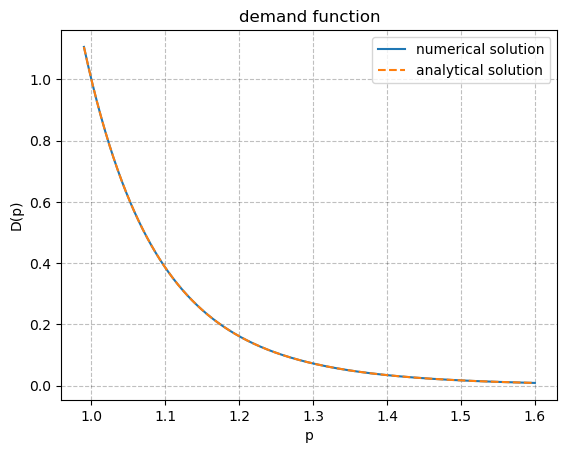

In [144]:
quasi.plot_demand()

**Question 2:** Solve the seller's problem numerically, taking into account optimal demand of the buyer. Verify that what you find numerically is equal to the analytical solution: $p^* = \left(\frac{\epsilon}{\epsilon-1} \right)^\frac{\epsilon}{2\epsilon-1}$. <br>
*Hint:* For this problem you can use the analytical solution to $D(p)$, but it is recomended that you use the numerical solution to $D(p)$ from question 1, and nest that when solving the seller's problem, as you will need to do that in the next question.

In [145]:
# write your answer here

In [146]:
quasi.analytical_quasilinear()

p  = 1.057
A consumes:
cm = 0.574
c  = 9.393
B consumes:
cm = 0.607
c  = 9.426


solution: 
p         = 1.057
cm_buyer  = 0.574
c_buyer   = 9.393
cm_seller = 0.607
c_seller  = 9.426



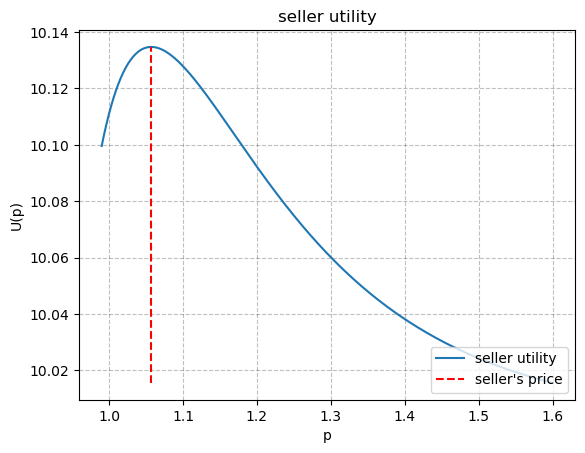

In [147]:
quasi.plot_seller_utility()

Now consider a fully non-linear utility function, for both agents:
\begin{align}
u_A = u_B = u(c,c') = \frac{(c)^{1-\frac{1}{\eta}} }{1-\frac{1}{\eta}}+ \frac{(c')^{1-\frac{1}{\epsilon}} }{1-\frac{1}{\epsilon}}
\end{align}

**Question 3:** Solve for $p^*$ for the fully non-linear utility function, for $\eta \in \left\{1000,10\right\}$ <br>
*Hint:* Note that this requires both solving the buyer's problem and the seller's problem numerically. 

In [148]:
# write your answer here

In [149]:
nonlin = ConflictModel()
par = nonlin.par
sol = nonlin.sol
par.eta = 1000
nonlin.utility = nonlin.utility_nonl

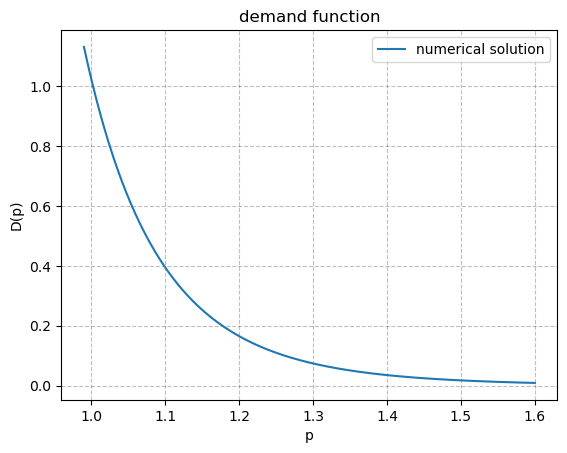

In [150]:
nonlin.plot_demand()

solution: 
p         = 1.057
cm_buyer  = 0.587
c_buyer   = 9.380
cm_seller = 0.620
c_seller  = 9.413



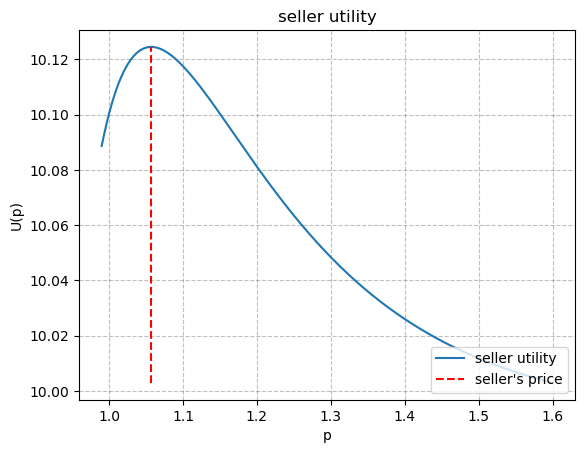

In [151]:
nonlin.plot_seller_utility()

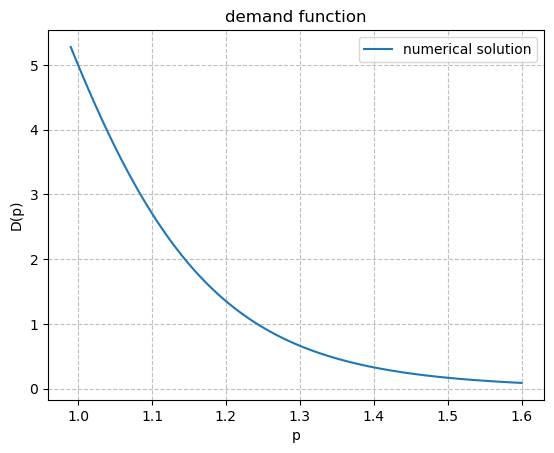

solution: 
p         = 1.082
cm_buyer  = 3.050
c_buyer   = 6.700
cm_seller = 3.300
c_seller  = 6.950



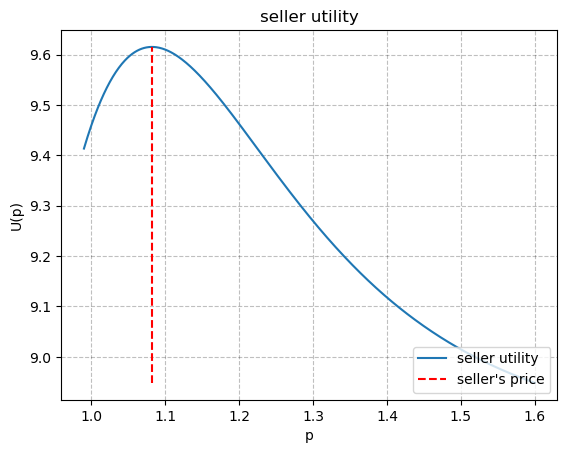

In [152]:
par.eta = 10
nonlin.plot_demand()
nonlin.plot_seller_utility()

**Question 3:** Make two plots of $p^*$, both with $\eta=10$: 
- One of how $p^*$ changes with $\epsilon\in \left[5,30\right]$ and $e_{A}=10$
- One of how $p^*$ changes with $e_{A}\in \left[2.5,30\right]$ and $\epsilon=10$

In [153]:
# write your answer here

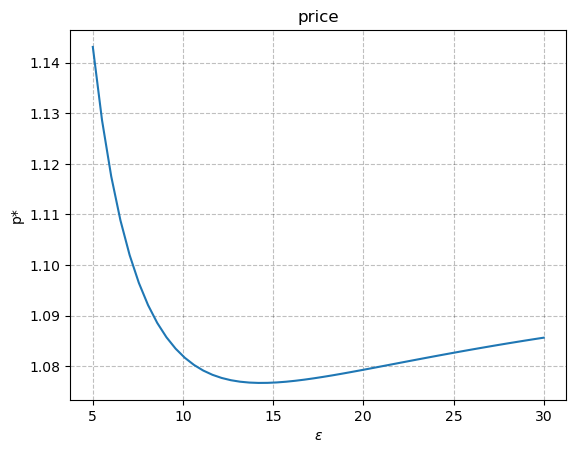

In [154]:
par.eta=10
nonlin.plot_p_across_epsilon()

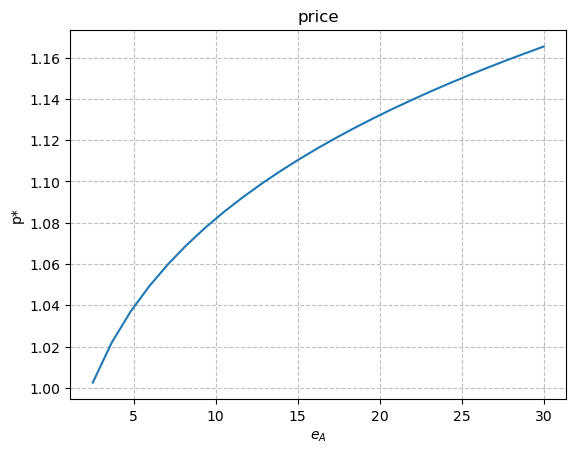

In [155]:
nonlin.plot_p_across_eA()

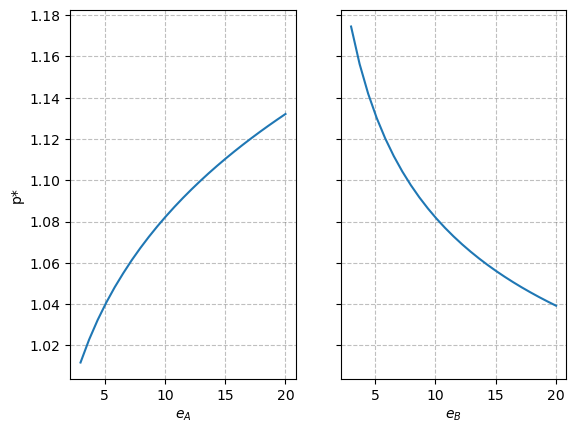

In [156]:
nonlin.plot_p_across_e()

## 3. <a id='toc3_'></a>[Problem 3: Segregation model](#toc0_)

**Definitions:**

We imagine a world, which can be described by a $30\times30$ grid of *positions*.

Initially, each position is *filled* by a person with a 80 percent probability, and otherwise it is *empty*.

If *filled* initially, it is a fifty-fifty chance whether the person belongs to group *red* or group *blue*.

We define a *neighborhood* of a position as the up to 8 positions only one step away in either direction (up/down, left/right, corners).

A person is *satisfied* if her group is not the minority in her neighborhood,

**Each period the following things happen:**

1. A random person is given the possibility to move.

2. The chosen person search empty positions at random. 

3. A move happens immediatly when an unsatisfied person finds an empty position where she is satisfied, and the period ends.

The code below creates the initial map.

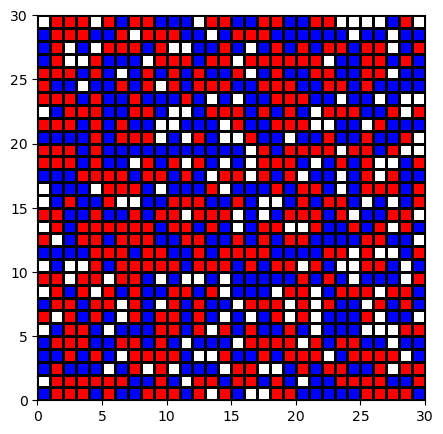

In [157]:
np.random.seed(123)
dim = 30
map = np.random.choice([0,1,2],size=(dim,dim),p=[0.20,0.40,0.40])

def display(map):
    
    cmap = colors.ListedColormap(['white','red', 'blue'])
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.pcolormesh(map,edgecolor='black',cmap=cmap)
    plt.show()

display(map)

**Question:** Simulate forwards for 10,000 periods and show how the world looks. Calculate the initial and final average number of same-group persons in the neighborhood of each person. Comment. <br>*You can use the code below with the functions `neigborhood` and `satisfied` to start from*.

In [158]:
'''
This function, neighborhood, and the satisfied function have been altered slightly from the exam version, 
they now include map as an argument, instead of reliying on the global variable map. 
This makes it easier to calulcates the correct average of the initial map after the global map variable has been altered.
'''
def neighborhood(group,i,j,map):
    """ find the number of same and different persons as group in the neighborhood of (i,j) 

    Args:

        group (int): group number [1,2]
        i (int): row index
        j (int): column index

    Returns:

        same (int): number of persons in same group
        different (int): number of persons in different group
        
    """

    same = 0
    different = 0
    for i_ in range(i-1,i+2): # i-1,i,i+1
        for j_ in range(j-1,j+2): # j-1,j,j+1
            
            # outside the map
            if i_ < 0 or i_ >= dim or j_ < 0 or j_ >= dim:
                continue

            # same person
            if i_ == i and j_ == j:
                continue
            
            # empty position
            if map[i_,j_] == 0:
                continue

            # same or different group
            if map[i_,j_] == group:
                same += 1
            else:
                different += 1   

    return same,different

In [159]:
def satisfied(group,i,j,map):
    """ check if person from group would be satisfied at (i,j)
        
    Args:

        group (int): group number [1,2]
        i (int): row index
        j (int): column index

    Output:

        bool: True if satisfied, False otherwise
       
    """

    same,different = neighborhood(group,i,j,map)        
            
    if same >= different:
        return True
    else:
        return False
    

In [160]:
# write your answer here

In [161]:
def ghetto_index(map):
    """ compute the ghetto index of the map """

    similarity = np.nan*np.ones((dim,dim))
    for i in range(dim):
        for j in range(dim):
            group = map[i,j]
            if group == 0: continue
            same,different = neighborhood(group,i,j,map)
            similarity[i,j] = same

    return np.nanmean(similarity)

In [162]:
def list_empty_positions(map):
    """ list all empty positions """

    empty = []
    for i in range(dim):
        for j in range(dim):
            if map[i,j] == 0:
                empty.append([i,j])

    return empty

def list_filled_positions(map):
    """ list all filled positions """
    
    filled = []
    for i in range(dim):
        for j in range(dim):
            if not map[i,j] == 0:
                filled.append([i,j])
                
    return filled


In [163]:
# a. prepare
map_ini = map.copy()

filled_position = list_filled_positions(map)
N_filled = len(filled_position)
empty_positions = list_empty_positions(map)
N_empty = len(empty_positions)

# b. iterate
it = 0
while True:

    if it%1000 == 0:
        same = ghetto_index(map)
        print(f'{it:5d}: {same:.2f}')

    # i. who might move
    k = np.random.choice(N_filled)

    i,j = filled_position[k]
    group = map[i,j]

    # ii. where to move
    if group == 0:

        pass
    
    elif satisfied(group,i,j,map):

        pass

    else:

        # search
        ls = np.random.permutation(N_empty)
        for l in ls:
            
            i_,j_ = empty_positions[l]

            if satisfied(group,i_,j_,map):

                map[i_,j_] = map[i,j]
                map[i,j] = 0

                filled_position[k] = [i_,j_]
                empty_positions[l] = [i,j]

                break
 
    it += 1
    if it > 10_000: break

    0: 3.02
 1000: 4.59
 2000: 5.18
 3000: 5.36
 4000: 5.43
 5000: 5.44
 6000: 5.44
 7000: 5.44
 8000: 5.44
 9000: 5.44
10000: 5.44


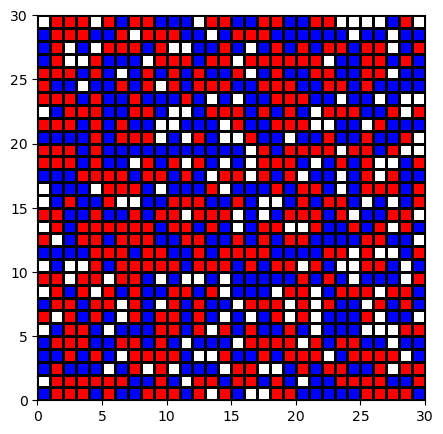

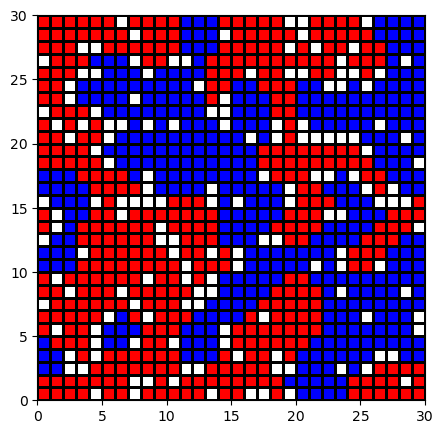

In [164]:
display(map_ini)
display(map)

In [165]:
print(f'initial ghetto-index: {ghetto_index(map_ini):.2f}')
print(f'final   ghetto-index: {ghetto_index(map):.2f}')

initial ghetto-index: 3.02
final   ghetto-index: 5.44
